In [43]:
#importing libraries to support the data analysis 

import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras import activations
np.random.seed(42)
tf.random.set_seed(42)

%matplotlib inline

In [44]:
#importing the datasets for each condition: diabetes, stroke and hypertension

dd = pd.read_csv("diabetes_data.csv")
hd = pd.read_csv("hypertension_data.csv")
sd = pd.read_csv("stroke_data.csv")

#The hypertension dataset had some null values in the "sex" column. Stroke dataset had this problem too.
#Also, the stroke dataset had some rows with the person's age below zero. These were removed, since
#negative age doesn't make any sense.

hd = hd.loc[hd['sex'].notnull()]
sd = sd.loc[(sd['sex'].notnull()) & (sd['age'] >= 0)]

In [45]:
#splitting the datasets in the inputs and outputs. The outputs are binary (0 and 1), where 0 equals
#the person not having the condition and 1 the person having the condition.

dd_x_input = dd.drop(['Diabetes'], axis=1)
dd_y_output = dd[['Diabetes']]

hd_x_input = hd.drop(['target'], axis=1)
hd_y_output = hd[['target']]

sd_x_input = sd.drop(['stroke'], axis=1)
sd_y_output = sd[['stroke']]

In [46]:
#Now we use 30% of the input and output datasets as the testing dataset, while the remaining 70% are
#used for training

dd_X_train, dd_X_test, dd_y_train, dd_y_test = train_test_split(dd_x_input, dd_y_output, test_size=0.3, random_state = 1)
hd_X_train, hd_X_test, hd_y_train, hd_y_test = train_test_split(hd_x_input, hd_y_output, test_size=0.3, random_state = 1)
sd_X_train, sd_X_test, sd_y_train, sd_y_test = train_test_split(sd_x_input, sd_y_output, test_size=0.3, random_state = 1)

#we scale the datasets for the neural networks (z-score normalization was used). Neural networks compare
#data across features, and when the data is scaled, the algorithm tends to converge faster. However,
#random forest, a tree-based algorithm, does not compare data across features, not being necessary to
#apply normalization.


def scale_datasets(X_train, X_test):
    standard_scaler = StandardScaler()
    X_train_scaled = pd.DataFrame(
        standard_scaler.fit_transform(X_train),
        columns= X_train.columns
    )
    X_test_scaled = pd.DataFrame(
        standard_scaler.transform(X_test),
        columns = X_test.columns
    )
    return X_train_scaled, X_test_scaled

dd_X_train_scaled, dd_X_test_scaled = scale_datasets(dd_X_train, dd_X_test)
hd_X_train_scaled, hd_X_test_scaled = scale_datasets(hd_X_train, hd_X_test)
sd_X_train_scaled, sd_X_test_scaled = scale_datasets(sd_X_train, sd_X_test)

dd_X_train_scaled = np.array(dd_X_train_scaled)
dd_X_test_scaled = np.array(dd_X_test_scaled)
dd_y_train = np.array(dd_y_train)
dd_y_test = np.array(dd_y_test)

hd_X_train_scaled = np.array(hd_X_train_scaled)
hd_X_test_scaled = np.array(hd_X_test_scaled)
hd_y_train = np.array(hd_y_train)
hd_y_test = np.array(hd_y_test)

sd_X_train_scaled = np.array(sd_X_train_scaled)
sd_X_test_scaled = np.array(sd_X_test_scaled)
sd_y_train = np.array(sd_y_train)
sd_y_test = np.array(sd_y_test)



In [52]:
#=============================
#START OF ARTIFICIAL NEURAL NETWORK TESTING
#=============================

#We use the sequential package from Keras to build customizable layers for the network. 
model = Sequential()
model.add(Dense(14, input_dim=17, activation="relu"))#, kernel_regularizer=keras.regularizers.l2(0.1)))
model.add(Dense(11, activation="relu"))
model.add(Dense(8, activation="relu"))#, kernel_regularizer=keras.regularizers.l2(0.1)))
model.add(Dense(5, activation="relu"))
model.add(Dense(2, activation="relu"))#, kernel_regularizer=keras.regularizers.l2(0.1)))
model.add(Dense(1, activation=tf.keras.activations.sigmoid))

#Compiling the model previously built.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#Applying the model to fit the data
history = model.fit(dd_X_train_scaled, dd_y_train, epochs=150, batch_size=32, verbose=1, validation_split = 0.15, shuffle = False)

#Applying the model to the test dataset to predict outputs
dd_y_predict = model.predict(dd_X_test_scaled)
dd_y_predict = np.array(np.array(list(map(lambda x: 0 if x<0.5 else 1, dd_y_predict))))
print("Accuracy for the prediction of diabetes:%.4f" % accuracy_score(np.array(dd_y_test), np.array(dd_y_predict)))

Epoch 1/150
1315/1315 [==============================] - 9s 3ms/step - loss: 0.5296 - accuracy: 0.7361 - val_loss: 0.5093 - val_accuracy: 0.7508
Epoch 2/150
1315/1315 [==============================] - 3s 2ms/step - loss: 0.5119 - accuracy: 0.7455 - val_loss: 0.5065 - val_accuracy: 0.7521
Epoch 3/150
1315/1315 [==============================] - 3s 2ms/step - loss: 0.5094 - accuracy: 0.7478 - val_loss: 0.5051 - val_accuracy: 0.7512
Epoch 4/150
1315/1315 [==============================] - 2s 2ms/step - loss: 0.5079 - accuracy: 0.7479 - val_loss: 0.5050 - val_accuracy: 0.7504
Epoch 5/150
1315/1315 [==============================] - 2s 2ms/step - loss: 0.5066 - accuracy: 0.7496 - val_loss: 0.5040 - val_accuracy: 0.7497
Epoch 6/150
1315/1315 [==============================] - 2s 2ms/step - loss: 0.5057 - accuracy: 0.7504 - val_loss: 0.5041 - val_accuracy: 0.7497
Epoch 7/150
1315/1315 [==============================] - 3s 2ms/step - loss: 0.5050 - accuracy: 0.7503 - val_loss: 0.5039 - val_ac

1315/1315 [==============================] - 2s 2ms/step - loss: 0.4974 - accuracy: 0.7539 - val_loss: 0.5111 - val_accuracy: 0.7466
Epoch 58/150
1315/1315 [==============================] - 2s 2ms/step - loss: 0.4973 - accuracy: 0.7536 - val_loss: 0.5115 - val_accuracy: 0.7517
Epoch 59/150
1315/1315 [==============================] - 2s 2ms/step - loss: 0.4974 - accuracy: 0.7535 - val_loss: 0.5102 - val_accuracy: 0.7529
Epoch 60/150
1315/1315 [==============================] - 2s 2ms/step - loss: 0.4974 - accuracy: 0.7535 - val_loss: 0.5097 - val_accuracy: 0.7533
Epoch 61/150
1315/1315 [==============================] - 2s 2ms/step - loss: 0.4971 - accuracy: 0.7537 - val_loss: 0.5089 - val_accuracy: 0.7520
Epoch 62/150
1315/1315 [==============================] - 2s 2ms/step - loss: 0.4972 - accuracy: 0.7537 - val_loss: 0.5096 - val_accuracy: 0.7527
Epoch 63/150
1315/1315 [==============================] - 2s 2ms/step - loss: 0.4972 - accuracy: 0.7532 - val_loss: 0.5105 - val_accuracy

1315/1315 [==============================] - 2s 2ms/step - loss: 0.4953 - accuracy: 0.7553 - val_loss: 0.5124 - val_accuracy: 0.7525
Epoch 114/150
1315/1315 [==============================] - 2s 2ms/step - loss: 0.4946 - accuracy: 0.7563 - val_loss: 0.5111 - val_accuracy: 0.7543
Epoch 115/150
1315/1315 [==============================] - 2s 2ms/step - loss: 0.4951 - accuracy: 0.7558 - val_loss: 0.5118 - val_accuracy: 0.7521
Epoch 116/150
1315/1315 [==============================] - 2s 2ms/step - loss: 0.4951 - accuracy: 0.7558 - val_loss: 0.5108 - val_accuracy: 0.7527
Epoch 117/150
1315/1315 [==============================] - 2s 2ms/step - loss: 0.4951 - accuracy: 0.7549 - val_loss: 0.5120 - val_accuracy: 0.7517
Epoch 118/150
1315/1315 [==============================] - 2s 2ms/step - loss: 0.4953 - accuracy: 0.7554 - val_loss: 0.5106 - val_accuracy: 0.7531
Epoch 119/150
1315/1315 [==============================] - 2s 2ms/step - loss: 0.4948 - accuracy: 0.7556 - val_loss: 0.5115 - val_ac

In [32]:
#We use the sequential package from Keras to build customizable layers for the network. 
model = Sequential()
model.add(Dense(11, input_dim=13, activation="relu", kernel_regularizer=keras.regularizers.l2(0.1)))
model.add(Dense(9, activation="relu"))
model.add(Dense(7, activation="relu", kernel_regularizer=keras.regularizers.l2(0.1)))
model.add(Dense(5, activation="relu"))
model.add(Dense(3, activation="relu", kernel_regularizer=keras.regularizers.l2(0.1)))
model.add(Dense(1, activation=tf.keras.activations.sigmoid))

#Compiling the model previously built.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#Applying the model to fit the data
history = model.fit(hd_X_train_scaled, hd_y_train, epochs=150, batch_size=32, verbose=1, validation_split = 0.15, shuffle = False)

#Applying the model to the test dataset to predict outputs
hd_y_predict = model.predict(hd_X_test_scaled)
hd_y_predict = np.array(np.array(list(map(lambda x: 0 if x<0.5 else 1, hd_y_predict))))
print("Accuracy for the prediction of hypertension:%.4f" % accuracy_score(np.array(hd_y_test), np.array(hd_y_predict)))

Epoch 1/150
485/485 [==============================] - 2s 2ms/step - loss: 1.3787 - accuracy: 0.6389 - val_loss: 0.6848 - val_accuracy: 0.8509
Epoch 2/150
485/485 [==============================] - 1s 2ms/step - loss: 0.5621 - accuracy: 0.8557 - val_loss: 0.4919 - val_accuracy: 0.8706
Epoch 3/150
485/485 [==============================] - 1s 2ms/step - loss: 0.4638 - accuracy: 0.8804 - val_loss: 0.4369 - val_accuracy: 0.8827
Epoch 4/150
485/485 [==============================] - 1s 2ms/step - loss: 0.4219 - accuracy: 0.8904 - val_loss: 0.4042 - val_accuracy: 0.8911
Epoch 5/150
485/485 [==============================] - 1s 2ms/step - loss: 0.3910 - accuracy: 0.8954 - val_loss: 0.3780 - val_accuracy: 0.8867
Epoch 6/150
485/485 [==============================] - 1s 2ms/step - loss: 0.3634 - accuracy: 0.9024 - val_loss: 0.3528 - val_accuracy: 0.9075
Epoch 7/150
485/485 [==============================] - 1s 2ms/step - loss: 0.3346 - accuracy: 0.9091 - val_loss: 0.3137 - val_accuracy: 0.9185

Epoch 58/150
485/485 [==============================] - 1s 2ms/step - loss: 0.1330 - accuracy: 0.9783 - val_loss: 0.1583 - val_accuracy: 0.9740
Epoch 59/150
485/485 [==============================] - 1s 2ms/step - loss: 0.1199 - accuracy: 0.9833 - val_loss: 0.1182 - val_accuracy: 0.9857
Epoch 60/150
485/485 [==============================] - 1s 2ms/step - loss: 0.1294 - accuracy: 0.9779 - val_loss: 0.1741 - val_accuracy: 0.9627
Epoch 61/150
485/485 [==============================] - 1s 2ms/step - loss: 0.1215 - accuracy: 0.9819 - val_loss: 0.1166 - val_accuracy: 0.9832
Epoch 62/150
485/485 [==============================] - 1s 2ms/step - loss: 0.1243 - accuracy: 0.9814 - val_loss: 0.1719 - val_accuracy: 0.9583
Epoch 63/150
485/485 [==============================] - 1s 2ms/step - loss: 0.1287 - accuracy: 0.9790 - val_loss: 0.1714 - val_accuracy: 0.9649
Epoch 64/150
485/485 [==============================] - 1s 2ms/step - loss: 0.1214 - accuracy: 0.9814 - val_loss: 0.1226 - val_accuracy:

Epoch 115/150
485/485 [==============================] - 1s 2ms/step - loss: 0.1114 - accuracy: 0.9804 - val_loss: 0.1159 - val_accuracy: 0.9821
Epoch 116/150
485/485 [==============================] - 1s 2ms/step - loss: 0.1046 - accuracy: 0.9845 - val_loss: 0.1137 - val_accuracy: 0.9803
Epoch 117/150
485/485 [==============================] - 1s 2ms/step - loss: 0.1092 - accuracy: 0.9817 - val_loss: 0.1174 - val_accuracy: 0.9773
Epoch 118/150
485/485 [==============================] - 1s 2ms/step - loss: 0.1065 - accuracy: 0.9829 - val_loss: 0.1315 - val_accuracy: 0.9715
Epoch 119/150
485/485 [==============================] - 1s 2ms/step - loss: 0.1045 - accuracy: 0.9839 - val_loss: 0.1286 - val_accuracy: 0.9722
Epoch 120/150
485/485 [==============================] - 1s 2ms/step - loss: 0.1138 - accuracy: 0.9801 - val_loss: 0.1382 - val_accuracy: 0.9766
Epoch 121/150
485/485 [==============================] - 1s 2ms/step - loss: 0.0999 - accuracy: 0.9858 - val_loss: 0.1038 - val_ac

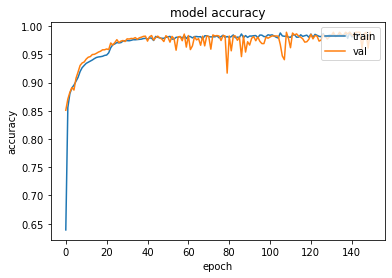

In [33]:
#plotting the learning curve to help to see if the model is overfitting

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [27]:
#We use the sequential package from Keras to build customizable layers for the network. 
model = Sequential()
model.add(Dense(8, input_dim=10, activation="relu", kernel_regularizer=keras.regularizers.l2(0.1)))
model.add(Dense(6, activation="relu"))
model.add(Dense(4, activation="relu", kernel_regularizer=keras.regularizers.l2(0.1)))
model.add(Dense(2, activation="relu"))
#model.add(Dense(2, activation="relu", kernel_regularizer=keras.regularizers.l2(0.1)))
model.add(Dense(1, activation=tf.keras.activations.sigmoid))

#Compiling the model previously built.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#Applying the model to fit the data
history = model.fit(sd_X_train_scaled, sd_y_train, epochs=150, batch_size=32, verbose=1, validation_split = 0.15, shuffle = False)

#Applying the model to the test dataset to predict outputs
sd_y_predict = model.predict(sd_X_test_scaled)
sd_y_predict = np.array(np.array(list(map(lambda x: 0 if x<0.5 else 1, sd_y_predict))))
print("Accuracy for the prediction of stroke:%.4f" % accuracy_score(np.array(sd_y_test), np.array(sd_y_predict)))

Epoch 1/150
760/760 [==============================] - 3s 2ms/step - loss: 0.9444 - accuracy: 0.6482 - val_loss: 0.6570 - val_accuracy: 0.6753
Epoch 2/150
760/760 [==============================] - 1s 2ms/step - loss: 0.6317 - accuracy: 0.6898 - val_loss: 0.6302 - val_accuracy: 0.6795
Epoch 3/150
760/760 [==============================] - 1s 2ms/step - loss: 0.6181 - accuracy: 0.6889 - val_loss: 0.6218 - val_accuracy: 0.6825
Epoch 4/150
760/760 [==============================] - 1s 2ms/step - loss: 0.6119 - accuracy: 0.6901 - val_loss: 0.6173 - val_accuracy: 0.6828
Epoch 5/150
760/760 [==============================] - 1s 2ms/step - loss: 0.6082 - accuracy: 0.6907 - val_loss: 0.6142 - val_accuracy: 0.6837
Epoch 6/150
760/760 [==============================] - 2s 3ms/step - loss: 0.6050 - accuracy: 0.6919 - val_loss: 0.6115 - val_accuracy: 0.6841
Epoch 7/150
760/760 [==============================] - 2s 3ms/step - loss: 0.6021 - accuracy: 0.6930 - val_loss: 0.6090 - val_accuracy: 0.6886

Epoch 58/150
760/760 [==============================] - 1s 2ms/step - loss: 0.5438 - accuracy: 0.7344 - val_loss: 0.5456 - val_accuracy: 0.7266
Epoch 59/150
760/760 [==============================] - 2s 2ms/step - loss: 0.5433 - accuracy: 0.7341 - val_loss: 0.5460 - val_accuracy: 0.7235
Epoch 60/150
760/760 [==============================] - 1s 2ms/step - loss: 0.5428 - accuracy: 0.7339 - val_loss: 0.5451 - val_accuracy: 0.7259
Epoch 61/150
760/760 [==============================] - 2s 3ms/step - loss: 0.5421 - accuracy: 0.7338 - val_loss: 0.5435 - val_accuracy: 0.7256
Epoch 62/150
760/760 [==============================] - 2s 2ms/step - loss: 0.5417 - accuracy: 0.7347 - val_loss: 0.5442 - val_accuracy: 0.7252
Epoch 63/150
760/760 [==============================] - 1s 2ms/step - loss: 0.5412 - accuracy: 0.7338 - val_loss: 0.5432 - val_accuracy: 0.7273
Epoch 64/150
760/760 [==============================] - 1s 2ms/step - loss: 0.5406 - accuracy: 0.7344 - val_loss: 0.5433 - val_accuracy:

Epoch 115/150
760/760 [==============================] - 1s 2ms/step - loss: 0.5182 - accuracy: 0.7516 - val_loss: 0.5205 - val_accuracy: 0.7483
Epoch 116/150
760/760 [==============================] - 1s 1ms/step - loss: 0.5175 - accuracy: 0.7540 - val_loss: 0.5207 - val_accuracy: 0.7536
Epoch 117/150
760/760 [==============================] - 1s 1ms/step - loss: 0.5176 - accuracy: 0.7541 - val_loss: 0.5194 - val_accuracy: 0.7562
Epoch 118/150
760/760 [==============================] - 1s 2ms/step - loss: 0.5167 - accuracy: 0.7546 - val_loss: 0.5187 - val_accuracy: 0.7527
Epoch 119/150
760/760 [==============================] - 1s 2ms/step - loss: 0.5162 - accuracy: 0.7553 - val_loss: 0.5171 - val_accuracy: 0.7529
Epoch 120/150
760/760 [==============================] - 1s 1ms/step - loss: 0.5156 - accuracy: 0.7560 - val_loss: 0.5172 - val_accuracy: 0.7529
Epoch 121/150
760/760 [==============================] - 1s 1ms/step - loss: 0.5154 - accuracy: 0.7548 - val_loss: 0.5151 - val_ac

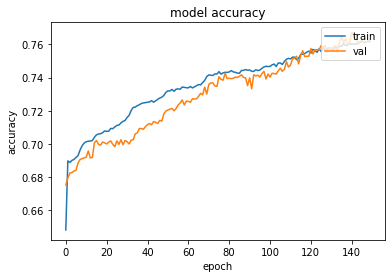

In [28]:
#plotting the learning curve to help to see if the model is overfitting

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [50]:
#=============================
#START OF RANDOM FOREST TESTING
#=============================

#setting variable parameters of the random forest to be tested later during the optimization of
#the parameters

n_estimators = [5, 20, 50, 100, 150, 200]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)]
min_samples_split = [2, 6, 10, 14] 
min_samples_leaf = [1, 3, 4, 6, 9] 
bootstrap = [True, False]

grid = {'n_estimators': n_estimators,
'max_features': max_features,
'max_depth': max_depth,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf,
'bootstrap': bootstrap}

#Building the random forest models for each condition without setting internal parameters manually

RF_classifier_d = RandomForestClassifier(random_state=42)
RF_classifier_d.fit(dd_X_train, dd_y_train.ravel())
dd_y_predict = RF_classifier_d.predict(dd_X_test)
print('Random Forest Accuracy for diabetes: {0:0.4f}'. format(accuracy_score(dd_y_test, dd_y_predict)))


RF_classifier_h = RandomForestClassifier(random_state=42)
RF_classifier_h.fit(hd_X_train, hd_y_train.ravel())
hd_y_predict = RF_classifier_h.predict(hd_X_test)
print('Random Forest Accuracy for hypertension: {0:0.4f}'. format(accuracy_score(hd_y_test, hd_y_predict)))


RF_classifier_s = RandomForestClassifier(random_state=42)
RF_classifier_s.fit(sd_X_train, sd_y_train.ravel())
sd_y_predict = RF_classifier_s.predict(sd_X_test)
print('Random Forest Accuracy for stroke: {0:0.4f}'. format(accuracy_score(sd_y_test, sd_y_predict)))


#Running the Random Seacrh in order to find, for each dataset, the best parameters of the random
#trees in order to obtain the best predictions.

RF_classifier_d = RandomForestClassifier(random_state=42)
RF_Search_Params_d = RandomizedSearchCV(estimator = RF_classifier_d, param_distributions = grid,
               n_iter = 40, verbose=1, random_state=42)
RF_Search_Params_d.fit(dd_X_train, dd_y_train.ravel())
print ('Best RF parameters for diabetes: ', RF_Search_Params_d.best_params_, ' \n')


RF_classifier_h = RandomForestClassifier(random_state=42)
RF_Search_Params_h = RandomizedSearchCV(estimator = RF_classifier_h, param_distributions = grid,
               n_iter =40, verbose=1, random_state=42)
RF_Search_Params_h.fit(hd_X_train, hd_y_train.ravel())
print ('Best RF parameters for hypertension: ', RF_Search_Params_h.best_params_, ' \n')


RF_classifier_s = RandomForestClassifier(random_state=42)
RF_Search_Params_s = RandomizedSearchCV(estimator = RF_classifier_s, param_distributions = grid,
               n_iter = 40, verbose=1, random_state=42)
RF_Search_Params_s.fit(sd_X_train, sd_y_train.ravel())
print ('Best RF parameters for stroke: ', RF_Search_Params_s.best_params_, ' \n')




Random Forest Accuracy for diabetes: 0.7261
Random Forest Accuracy for hypertension: 1.0000
Random Forest Accuracy for stroke: 0.9972
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best RF parameters for diabetes:  {'n_estimators': 150, 'min_samples_split': 14, 'min_samples_leaf': 6, 'max_features': 'auto', 'max_depth': 120, 'bootstrap': True}  

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best RF parameters for hypertension:  {'n_estimators': 50, 'min_samples_split': 14, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': True}  

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best RF parameters for stroke:  {'n_estimators': 200, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 100, 'bootstrap': False}  



In [51]:
#Re-running the random trees modeling now using the best parameters found previously.

RF_classifier_d = RandomForestClassifier(n_estimators = 150, min_samples_split = 14, min_samples_leaf= 6, 
                                         max_features = 'auto', max_depth= 120, bootstrap=True, random_state=42)
RF_classifier_d.fit(dd_X_train, dd_y_train.ravel())
dd_y_predict = RF_classifier_d.predict(dd_X_test)
print('Random Forest Improved Accuracy for diabetes: {0:0.4f}'. format(accuracy_score(dd_y_test, dd_y_predict)))


RF_classifier_h = RandomForestClassifier(n_estimators = 50, min_samples_split = 14, min_samples_leaf= 1, 
                                         max_features = 'sqrt', max_depth= 40, bootstrap=True, random_state=42)
RF_classifier_h.fit(hd_X_train, hd_y_train.ravel())
hd_y_predict = RF_classifier_h.predict(hd_X_test)
print('Random Forest Improved Accuracy for hypertension: {0:0.4f}'. format(accuracy_score(hd_y_test, hd_y_predict)))


RF_classifier_s = RandomForestClassifier(n_estimators = 200, min_samples_split = 6, min_samples_leaf= 1, 
                                         max_features = 'auto', max_depth= 100, bootstrap=False, random_state=42)
RF_classifier_s.fit(sd_X_train, sd_y_train.ravel())
sd_y_predict = RF_classifier_s.predict(sd_X_test)
print('Random Forest Improved Accuracy for stroke: {0:0.4f}'. format(accuracy_score(sd_y_test, sd_y_predict)))

Random Forest Improved Accuracy for diabetes: 0.7494
Random Forest Improved Accuracy for hypertension: 1.0000
Random Forest Improved Accuracy for stroke: 0.9978
